In [1]:
import h5py
import numpy as np

def data_loader_DATA(file_to_load):
    

    # Loads the .hdf5 file
    hf = h5py.File(file_to_load,'r')
    

    # Cria lista para armarezar as variáveis
    if filename=='mtg' or filename=='eball' or filename=='extended_ballroom' or filename=='lmd':
        X_train = []
        Y_train = []
        X_val = []
        Y_val = []
        Classes_sort = []
        Rcr_classes = []
    else:
        X_test = []
        Y_test = []
        Classes_sort = []
        Rcr_classes = []

    # Extrai as variáveis 
    if filename=='mtg' or filename=='eball' or filename=='extended_ballroom' or filename=='lmd':
        X_train.append(np.array(hf.get('Xtrain').get('Xtrain')))
        Y_train.append(np.array(hf.get('Ytrain').get('Ytrain')))
        X_val.append(np.array(hf.get('Xval').get('Xval')))
        Y_val.append(np.array(hf.get('Yval').get('Yval')))
        Classes_sort.append(np.array(hf.get('Classessort').get('Classessort')))
        Rcr_classes.append(np.array(hf.get('Rcr').get('Rcr')))
    else:
        X_test.append(np.array(hf.get('Xtest').get('Xtest')))
        Y_test.append(np.array(hf.get('Ytest').get('Ytest')))
        Classes_sort.append(np.array(hf.get('Classessort').get('Classessort')))
        Rcr_classes.append(np.array(hf.get('Rcr').get('Rcr')))



    # Saves in a dictionary
    if filename=='mtg' or filename=='eball' or filename=='extended_ballroom' or filename=='lmd':
        data = {    
               "X_train": X_train,
               "Y_train": Y_train,
               "X_val": X_val,
               "Y_val": Y_val,
               "Classes_sort": Classes_sort,
               "Rcr_classes": Rcr_classes
        }
    else:
        data = {    
               "X_test": X_test,
               "Y_test": Y_test,
               "Classes_sort": Classes_sort,
               "Rcr_classes": Rcr_classes
        }

    
    hf.close()
    return data

C:\Users\Enrique\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
train=["eball","mtg","lmd"]
for i in train:
    whole_data_test = []
    filename=i
    file_to_load = 'h5/Data_' + str(filename) + '.hdf5'
    data = data_loader_DATA(file_to_load)
    whole_data_test.append(data)
    
    print('X_train Size '+str(i),whole_data_test[0]['X_train'][0].shape)
    print('Y_train Size '+str(i),whole_data_test[0]['Y_train'][0].shape)
    print('X_val Size '+str(i),whole_data_test[0]['X_val'][0].shape)
    print('Y_val Size '+str(i),whole_data_test[0]['Y_val'][0].shape)
    print('Classes_sort Size '+str(i),whole_data_test[0]['Classes_sort'][0].shape)
    print('Rcr_classes '+str(i),whole_data_test[0]['Rcr_classes'][0].shape)
    X_train = whole_data_test[0]['X_train'][0]
    Y_train = whole_data_test[0]['Y_train'][0]
    X_val = whole_data_test[0]['X_val'][0]
    Y_val = whole_data_test[0]['Y_val'][0]
    Classes_sort = whole_data_test[0]['Classes_sort'][0]
    Rcr_classes = whole_data_test[0]['Rcr_classes'][0]

    if i=="eball":
        X_train_0 = X_train
        Y_train_0 = Y_train
        X_val_0 = X_val
        Y_val_0 = Y_val
    elif i=="mtg":
        X_train_1 = X_train
        Y_train_1 = Y_train
        X_val_1 = X_val
        Y_val_1 = Y_val
    elif i=="lmd":
        X_train_2 = X_train
        Y_train_2 = Y_train
        X_val_2 = X_val
        Y_val_2 = Y_val

X_train=np.concatenate((X_train_0,X_train_1,X_train_2))
Y_train=np.concatenate((Y_train_0,Y_train_1,Y_train_2))
X_val=np.concatenate((X_val_0,X_val_1,X_val_2))
Y_val=np.concatenate((Y_val_0,Y_val_1,Y_val_2))
print()
print('X_train Size',X_train.shape)
print('Y_train Size',Y_train.shape)
print('X_val Size',X_val.shape)
print('Y_val Size',Y_val.shape)


X_train Size eball (3443, 17, 18, 3)
Y_train Size eball (3443, 250)
X_val Size eball (383, 17, 18, 3)
Y_val Size eball (383, 250)
Classes_sort Size eball (83, 1)
Rcr_classes eball (83,)
X_train Size mtg (1053, 17, 18, 3)
Y_train Size mtg (1053, 250)
X_val Size mtg (117, 17, 18, 3)
Y_val Size mtg (117, 250)
Classes_sort Size mtg (105, 1)
Rcr_classes mtg (105,)
X_train Size lmd (3244, 17, 18, 3)
Y_train Size lmd (3244, 250)
X_val Size lmd (361, 17, 18, 3)
Y_val Size lmd (361, 250)
Classes_sort Size lmd (102, 1)
Rcr_classes lmd (102,)

X_train Size (7740, 17, 18, 3)
Y_train Size (7740, 250)
X_val Size (861, 17, 18, 3)
Y_val Size (861, 250)


In [3]:
# print("ESCOLHER DATABASE PARA CNN")
print("Opções de escolha:")
print("1 = ACM_MIRUM")
print("2 = HAINSWORTH")
print("3 = SMC_MIRUM")
print("4 = GTZAN_GENRES")
print("5 = EBALL")
print("6 = MTG")
print("7 = GIANTSTEPS")
print("8 = LMD")
print("9 = EXTENDEND_BALLROOM")


database=int(input('Qual Dataset será usado?'))
if database==1:
    filename = 'acm_mirum'
elif database==2:
    filename = 'hainsworth'
elif database==3:
    filename = 'smc_mirum'
elif database==4:
    filename = 'gtzan'
elif database==5:
    filename= 'eball'
elif database==6:
    filename= 'mtg'
elif database==7:
    filename= 'giantsteps'
elif database==8:
    filename= 'lmd'
elif database==9:
    filename= 'extended_ballroom'



print("Você escolheu o Database=", filename)

Opções de escolha:
1 = ACM_MIRUM
2 = HAINSWORTH
3 = SMC_MIRUM
4 = GTZAN_GENRES
5 = EBALL
6 = MTG
7 = GIANTSTEPS
8 = LMD
9 = EXTENDEND_BALLROOM


Qual Dataset será usado? 1


Você escolheu o Database= acm_mirum


In [4]:
whole_data_test = []
file_to_load = 'h5/Data_' + str(filename) + '.hdf5'
data = data_loader_DATA(file_to_load)
whole_data_test.append(data)
if filename=='mtg' or filename=='eball' or filename=='extended_ballroom' or filename=='lmd':
    print('X_train Size',whole_data_test[0]['X_train'][0].shape)
    print('Y_train Size',whole_data_test[0]['Y_train'][0].shape)
    print('X_val Size',whole_data_test[0]['X_val'][0].shape)
    print('Y_val Size',whole_data_test[0]['Y_val'][0].shape)
    print('Classes_sort Size',whole_data_test[0]['Classes_sort'][0].shape)
    print('Rcr_classes',whole_data_test[0]['Rcr_classes'][0].shape)
else:
    print('X_test Size',whole_data_test[0]['X_test'][0].shape)
    print('Y_test Size',whole_data_test[0]['Y_test'][0].shape)
    print('Classes_sort Size',whole_data_test[0]['Classes_sort'][0].shape)
    print('Rcr_classes',whole_data_test[0]['Rcr_classes'][0].shape)


if filename=='mtg' or filename=='eball' or filename=='extended_ballroom' or filename=='lmd':
    X_train = whole_data_test[0]['X_train'][0]
    Y_train = whole_data_test[0]['Y_train'][0]
    X_val = whole_data_test[0]['X_val'][0]
    Y_val = whole_data_test[0]['Y_val'][0]
    Classes_sort = whole_data_test[0]['Classes_sort'][0]
    Rcr_classes = whole_data_test[0]['Rcr_classes'][0]
else:
    X_test = whole_data_test[0]['X_test'][0]
    Y_test = whole_data_test[0]['Y_test'][0]
    Classes_sort = whole_data_test[0]['Classes_sort'][0]
    Rcr_classes = whole_data_test[0]['Rcr_classes'][0]

X_test Size (1410, 17, 18, 3)
Y_test Size (1410, 250)
Classes_sort Size (154, 1)
Rcr_classes (154,)


In [5]:
import numpy as np
np.random.seed(1337)
import time
import tensorflow as tf

import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout, AvgPool2D, LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping



import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

#seed=0
#np.random.seed(seed) # fix random seed
#tf.random.set_seed(seed)

Using TensorFlow backend.


In [6]:
model = Sequential()
model.add(Conv2D(input_shape=(17,18,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
#model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
#model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
#model.add(Dense(units=1024))
#model.add(LeakyReLU(alpha=0.1))
#model.add(Dropout(0.4))
#model.add(Dense(units=1024))
#model.add(LeakyReLU(alpha=0.1))
#model.add(Dropout(0.4))
model.add(Dense(units=1024,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(units=1024,activation="relu"))
model.add(Dropout(0.4))
#model.add(Dense(units=1024,activation="relu"))
#model.add(Dropout(0.4))
#model.add(Dense(units=1024,activation="relu"))
#model.add(Dropout(0.4))
#model.add(Dense(units=1024,activation="relu"))
#model.add(Dropout(0.4))
#model.add(Dense(units=1024,activation="relu"))
#model.add(Dropout(0.4))
#model.add(Dense(units=1024,activation="relu"))
#model.add(Dropout(0.4))
model.add(Dense(units=250, activation="softmax"))

In [7]:
#opt = Adam(lr=0.00005)
opt = Adam(lr=0.01)


#model.compile(optimizer='Adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#model.compile(optimizer=opt, loss=keras.losses.binary_crossentropy, metrics=['categorical_accuracy','accuracy'])

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 17, 18, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 18, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 9, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 9, 128)         73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 9, 128)         147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

In [9]:
epochs= 15
batch_size=128
start = time.time()

H = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_val, Y_val))
#H = model.fit(X_train, Y_train, batch_size=32, epochs=epochs)

end = time.time()
print(f"O tempo de execução foi de aproximadamente {round((end - start)/60)} minutos")

Train on 7740 samples, validate on 861 samples
Epoch 1/15
7740/7740 [==============================] - 29s 4ms/step - loss: 4.0945 - accuracy: 0.0862 - val_loss: 3.3456 - val_accuracy: 0.2009
Epoch 2/15
7740/7740 [==============================] - 26s 3ms/step - loss: 3.0253 - accuracy: 0.3097 - val_loss: 2.4649 - val_accuracy: 0.4181
Epoch 3/15
7740/7740 [==============================] - 29s 4ms/step - loss: 2.2430 - accuracy: 0.4699 - val_loss: 1.8847 - val_accuracy: 0.5366
Epoch 4/15
7740/7740 [==============================] - 26s 3ms/step - loss: 1.7474 - accuracy: 0.5699 - val_loss: 1.4237 - val_accuracy: 0.6458
Epoch 5/15
7740/7740 [==============================] - 29s 4ms/step - loss: 1.4472 - accuracy: 0.6381 - val_loss: 1.3109 - val_accuracy: 0.6667
Epoch 6/15
7740/7740 [==============================] - 29s 4ms/step - loss: 1.2642 - accuracy: 0.6743 - val_loss: 1.2242 - val_accuracy: 0.6725
Epoch 7/15
7740/7740 [==============================] - 28s 4ms/step - loss: 1.1362

In [10]:
score_train=model.evaluate(X_train,Y_train,verbose=1)
score_val=model.evaluate(X_val,Y_val,verbose=1)
print(f"Train accuracy: {round(score_train[1],4)*100}%")
print(f"Validation accuracy: {round(score_val[1],4)*100}%")

861/861 [==============================] - 1s 813us/step
Train accuracy: 88.14%
Validation accuracy: 71.54%


In [11]:
score_test=model.evaluate(X_test,Y_test,verbose=1)
print(f"Test accuracy: {round(score_test[1],4)*100}%")

1410/1410 [==============================] - 1s 802us/step
Test accuracy: 29.65%


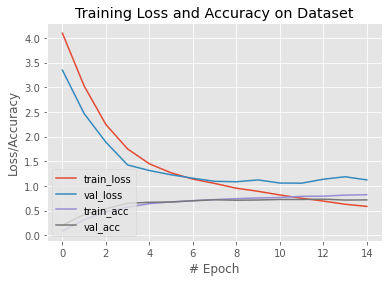

In [12]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("# Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig("plot.png")

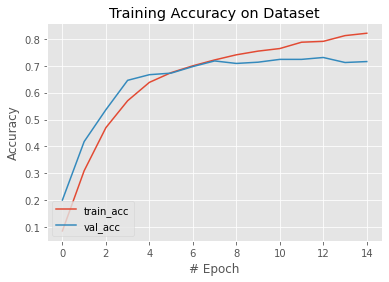

In [13]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Accuracy on Dataset")
plt.xlabel("# Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
#plt.savefig("plot.png")

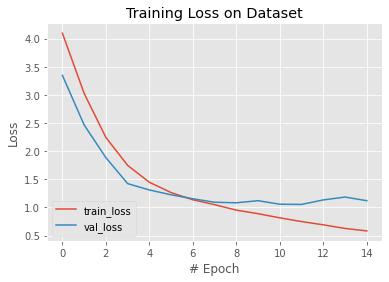

In [14]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.title("Training Loss on Dataset")
plt.xlabel("# Epoch")
plt.ylabel("Loss")
plt.legend(loc="lower left")
#plt.savefig("plot.png")

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 

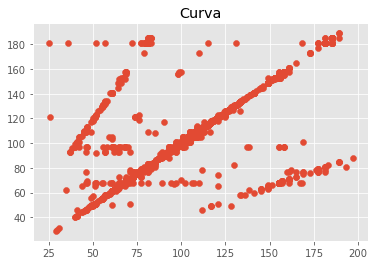

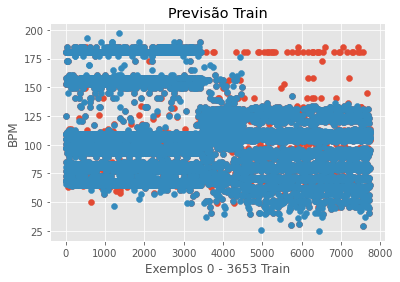

In [15]:
Auxtrain = [list(range(0,len(Y_train)))]
Auxtrain = np.array(Auxtrain).reshape(len(Y_train))
y_predtrainlist = []
y_trainlist = []
y_predtrain = model.predict(X_train)
for i in range (0,len(y_predtrain)):
    y_predtrain[i] = (y_predtrain[i] == np.max(y_predtrain[i]))
    aux = 0 
    for j in range(0,250):
        aux = aux + 1
        if (y_predtrain[i][j]==1):
            y_predtrainlist.append(aux)
        if (Y_train[i][j]==1):
            y_trainlist.append(aux)
#y_predtrain = (y_predtrain > 0.5)
#print(len(y_predtrain))
print(y_predtrain[1])
print(Y_train[1])
plt.scatter(y_trainlist,y_predtrainlist)
plt.title('Curva')
plt.show()
plt.scatter(Auxtrain,y_predtrainlist)
plt.scatter(Auxtrain,y_trainlist)
plt.xlabel('Exemplos 0 - 3653 Train')
plt.ylabel('BPM')
plt.title('Previsão Train')
plt.show()

(861, 250)
(861, 250)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

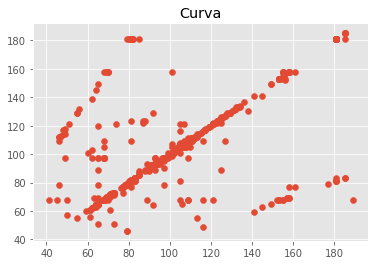

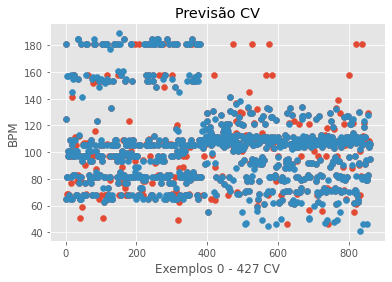

In [16]:
Auxval = [list(range(0,len(Y_val)))]
Auxval = np.array(Auxval).reshape(len(Y_val))
y_predvallist = []
y_vallist = []
y_predval = model.predict(X_val)
for i in range (0,len(y_predval)):
    y_predval[i] = (y_predval[i] == np.max(y_predval[i]))
    aux = 0
    for j in range(0,250):
        aux = aux + 1
        if (y_predval[i][j]==1):
            y_predvallist.append(aux)
        if (Y_val[i][j]==1):
            y_vallist.append(aux)

#y_predval = (y_predval > 0.5)
print(np.array(y_predval).shape)
print(np.array(Y_val).shape)
print(y_predval[1])
print(Y_val[1])
plt.scatter(y_vallist,y_predvallist)
plt.title('Curva')
plt.show()
plt.scatter(Auxval,y_predvallist)
plt.scatter(Auxval,y_vallist)
plt.xlabel('Exemplos 0 - 427 CV')
plt.ylabel('BPM')
plt.title('Previsão CV')
plt.show()

(1410, 250)
(1410, 250)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

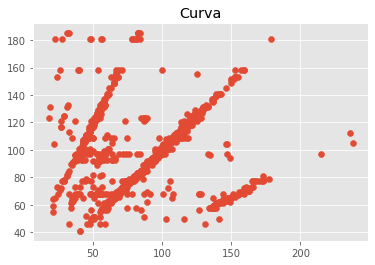

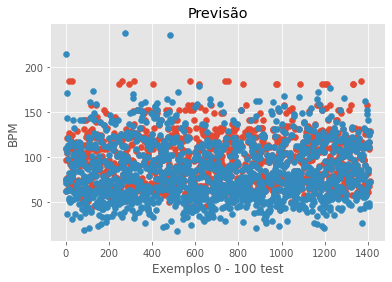

In [17]:
Auxtest = [list(range(0,len(Y_test)))]
Auxtest = np.array(Auxtest).reshape(len(Y_test))
y_predtestlist = []
y_testlist = []
y_predtest = model.predict(X_test)
for i in range (0,len(y_predtest)):
    y_predtest[i] = (y_predtest[i] == np.max(y_predtest[i]))
    aux = 0 
    for j in range(0,250):
        aux = aux + 1
        if (y_predtest[i][j]==1):
            y_predtestlist.append(aux)
        if (Y_test[i][j]==1):
            y_testlist.append(aux)
#y_predtest = (y_predtest > 0.5)
print(np.array(y_predtest).shape)
print(np.array(Y_test).shape)
print(y_predtest[1])
print(Y_test[1])
plt.scatter(y_testlist,y_predtestlist)
plt.title('Curva')
plt.show()
plt.scatter(Auxtest,y_predtestlist)    
plt.scatter(Auxtest,y_testlist)
plt.xlabel('Exemplos 0 - 100 test')
plt.ylabel('BPM')
plt.title('Previsão')
plt.show()
    

In [ ]:
#Tamanho da Figura
plt.rcParams['figure.figsize'] = (26,13)
ClassesIndex = Classes_sort.reshape(Rcr_classes.shape[0]) #1-D vector

#Treino
cm=metrics.confusion_matrix(Y_train.argmax(axis=1),y_predtrain.argmax(axis=1),normalize='pred',labels=range(Y_train.shape[1]))
df_cm = pd.DataFrame(cm, index = ClassesIndex, columns = ClassesIndex)
sn.set(font_scale=1) # for label size
#sn.heatmap(df_cm,linewidths=.5,cmap='hot',annot=True, annot_kws={"size": 16}) # Para fig size = 110,70
plt.title('Matriz de Confusão Treino')
sn.heatmap(df_cm,cmap='hot')
plt.show()

#Validação
cm=metrics.confusion_matrix(Y_val.argmax(axis=1),y_predval.argmax(axis=1),normalize='pred',labels=range(Y_val.shape[1]))
df_cm = pd.DataFrame(cm, index = ClassesIndex, columns = ClassesIndex)
sn.set(font_scale=1)
plt.title('Matriz de Confusão Validação')
sn.heatmap(df_cm,cmap='hot')
plt.show()

#Teste
cm=metrics.confusion_matrix(Y_test.argmax(axis=1),y_predtest.argmax(axis=1),normalize='pred',labels=range(Y_test.shape[1]))
df_cm = pd.DataFrame(cm, index = ClassesIndex, columns = ClassesIndex)
sn.set(font_scale=1)
plt.title('Matriz de Confusão Teste')
sn.heatmap(df_cm,cmap='hot')
plt.show()

In [18]:
limclass=np.array(Classes_sort).T.shape[1]
#Métrica 4% 
#Y_val[1], y_predval[1]

#---------Vetor Métrica------------#
metrica = [] #cada par de valor é uma métrica
for i in Classes_sort.T:
    a = i*0.04
    metrica.append(i-a)
    metrica.append(i+a)
    
#print(metrica)
#Metrica[0] == -4%
#Metrica[1] == +4%

#---------One hot to Linear------------#

    #===TRAIN===#
Y_train_ = []
Y_predtrain_ = []
Y_train_mtr1 = []
Y_predtrain_mtr1 = []

for cont in range(0,Y_train.shape[0]):
    a = 0
    i = 0
    i_pred = 0
    for a in range(0,Y_train.shape[1]):
        i = Y_train[cont][a]
        i_pred = y_predtrain[cont][a]
        if (i==1):
            Y_train_.append(a)
        if (i_pred==1):
            Y_predtrain_.append(a)
        a += 1
for i in range(0,Y_train.shape[0]):
    Y_train_mtr1.append(Y_train_[i]+20)
    Y_predtrain_mtr1.append(Y_predtrain_[i]+20)
    #Y_train_mtr1.append(Classes_sort.T[0][Y_train_[i]])
    #Y_predtrain_mtr1.append(Classes_sort.T[0][Y_predtrain_[i]])


    #===VAL===#
Y_val_ = []
Y_predval_ = []
Y_val_mtr1 = []
Y_predval_mtr1 = []

for cont in range(0,Y_val.shape[0]):
    a = 0
    i = 0
    i_pred = 0
    for a in range(0,Y_val.shape[1]):
        i = Y_val[cont][a]
        i_pred = y_predval[cont][a]
        if (i==1):
            Y_val_.append(a)
        if (i_pred==1):
            Y_predval_.append(a)
        a += 1
for i in range(0,Y_val.shape[0]):
    Y_val_mtr1.append(Y_val_[i]+20)
    Y_predval_mtr1.append(Y_predval_[i]+20)
    #Y_val_mtr1.append(Classes_sort.T[0][Y_val_[i]])
    #Y_predval_mtr1.append(Classes_sort.T[0][Y_predval_[i]])

    #===TEST===#
Y_test_ = []
Y_predtest_ = []
Y_test_mtr1 = []
Y_predtest_mtr1 = []

for cont in range(0,Y_test.shape[0]):
    a = 0
    i = 0
    i_pred = 0
    for a in range(0,Y_test.shape[1]):
        i = Y_test[cont][a]
        i_pred = y_predtest[cont][a]
        if (i==1):
            Y_test_.append(a)
        if (i_pred==1):
            Y_predtest_.append(a)
        a += 1
#print(Y_test_)
print(np.array(Y_predtest_).shape)
print(Y_test.shape[0])
for i in range(0,Y_test.shape[0]):
    Y_test_mtr1.append(Y_test_[i]+20)
    Y_predtest_mtr1.append(Y_predtest_[i]+20)

    #Y_test_mtr1.append(Classes_sort.T[0][Y_test_[i]])
    #Y_predtest_mtr1.append(Classes_sort.T[0][Y_predtest_[i]])
    

    


(1410,)
1410


In [19]:
#Métrica 1 
a1 = 0
for i in range(0,Y_train.shape[0]):
    if (Y_predtrain_mtr1[i]>=Y_train_mtr1[i]-0.04*Y_train_mtr1[i] and Y_predtrain_mtr1[i]<=Y_train_mtr1[i]+0.04*Y_train_mtr1[i]):
        a1 = a1 + 1
b1 = 0
for i in range(0,Y_val.shape[0]):
    if (Y_predval_mtr1[i]>=Y_val_mtr1[i]-0.04*Y_val_mtr1[i] and Y_predval_mtr1[i]<=Y_val_mtr1[i]+0.04*Y_val_mtr1[i]):
        b1 = b1 + 1

c1 = 0
for i in range(0,Y_test.shape[0]):
    if (Y_predtest_mtr1[i]>=Y_test_mtr1[i]-0.04*Y_test_mtr1[i] and Y_predtest_mtr1[i]<=Y_test_mtr1[i]+0.04*Y_test_mtr1[i]):
        c1 = c1 + 1
#Métrica 2
a2 = 0
for i in range(0,Y_train.shape[0]):
    if (Y_predtrain_mtr1[i]>=Y_train_mtr1[i]-0.04*Y_train_mtr1[i] and Y_predtrain_mtr1[i]<=Y_train_mtr1[i]+0.04*Y_train_mtr1[i] 
        or Y_predtrain_mtr1[i]>=(0.2*Y_train_mtr1[i])-0.04*(0.2*Y_train_mtr1[i]) and Y_predtrain_mtr1[i]<=(0.2*Y_train_mtr1[i])+0.04*(0.2*Y_train_mtr1[i]) 
        or Y_predtrain_mtr1[i]>=(2*Y_train_mtr1[i])-0.04*(2*Y_train_mtr1[i]) and Y_predtrain_mtr1[i]<=(2*Y_train_mtr1[i])+0.04*(2*Y_train_mtr1[i]) 
        or Y_predtrain_mtr1[i]>=(0.3*Y_train_mtr1[i])-0.04*(0.3*Y_train_mtr1[i]) and Y_predtrain_mtr1[i]<=(0.3*Y_train_mtr1[i])+0.04*(0.3*Y_train_mtr1[i]) 
        or Y_predtrain_mtr1[i]>=(3*Y_train_mtr1[i])-0.04*(3*Y_train_mtr1[i]) and Y_predtrain_mtr1[i]<=(3*Y_train_mtr1[i])+0.04*(3*Y_train_mtr1[i])):
        a2 = a2 + 1
b2 = 0
for i in range(0,Y_val.shape[0]):
    if (Y_predval_mtr1[i]>=Y_val_mtr1[i]-0.04*Y_val_mtr1[i] and Y_predval_mtr1[i]<=Y_val_mtr1[i]+0.04*Y_val_mtr1[i] 
        or Y_predval_mtr1[i]>=(0.2*Y_val_mtr1[i])-0.04*(0.2*Y_val_mtr1[i]) and Y_predval_mtr1[i]<=(0.2*Y_val_mtr1[i])+0.04*(0.2*Y_val_mtr1[i]) 
        or Y_predval_mtr1[i]>=(2*Y_val_mtr1[i])-0.04*(2*Y_val_mtr1[i]) and Y_predval_mtr1[i]<=(2*Y_val_mtr1[i])+0.04*(2*Y_val_mtr1[i])  
        or Y_predval_mtr1[i]>=(0.3*Y_val_mtr1[i])-0.04*(0.3*Y_val_mtr1[i]) and Y_predval_mtr1[i]<=(0.3*Y_val_mtr1[i])+0.04*(0.3*Y_val_mtr1[i])  
        or Y_predval_mtr1[i]>=(3*Y_val_mtr1[i])-0.04*(3*Y_val_mtr1[i]) and Y_predval_mtr1[i]<=(3*Y_val_mtr1[i])+0.04*(3*Y_val_mtr1[i])):
        b2 = b2 + 1
c2 = 0
for i in range(0,Y_test.shape[0]):
    if (Y_predtest_mtr1[i]>=Y_test_mtr1[i]-0.04*Y_test_mtr1[i] and Y_predtest_mtr1[i]<=Y_test_mtr1[i]+0.04*Y_test_mtr1[i]
        or Y_predtest_mtr1[i]>=(0.2*Y_test_mtr1[i])-0.04*(0.2*Y_test_mtr1[i]) and Y_predtest_mtr1[i]<=(0.2*Y_test_mtr1[i])+0.04*(0.2*Y_test_mtr1[i])  
        or Y_predtest_mtr1[i]>=(2*Y_test_mtr1[i])-0.04*(2*Y_test_mtr1[i]) and Y_predtest_mtr1[i]<=(2*Y_test_mtr1[i])+0.04*(2*Y_test_mtr1[i])  
        or Y_predtest_mtr1[i]>=(0.3*Y_test_mtr1[i])-0.04*(0.3*Y_test_mtr1[i]) and Y_predtest_mtr1[i]<=(0.3*Y_test_mtr1[i])+0.04*(0.3*Y_test_mtr1[i])  
        or Y_predtest_mtr1[i]>=(3*Y_test_mtr1[i])-0.04*(3*Y_test_mtr1[i]) and Y_predtest_mtr1[i]<=(3*Y_test_mtr1[i])+0.04*(3*Y_test_mtr1[i])):
        c2 = c2 + 1

#Métrica 3
a3 = 0
for i in range(0,Y_train.shape[0]):
    if (Y_predtrain_mtr1[i]>=Y_train_mtr1[i]-0.04*Y_train_mtr1[i] and Y_predtrain_mtr1[i]<=Y_train_mtr1[i]+0.04*Y_train_mtr1[i]
        or Y_predtrain_mtr1[i]>=(0.2*Y_train_mtr1[i])-0.04*(0.2*Y_train_mtr1[i]) and Y_predtrain_mtr1[i]<=(0.2*Y_train_mtr1[i])+0.04*(0.2*Y_train_mtr1[i]) 
        or Y_predtrain_mtr1[i]>=(2*Y_train_mtr1[i])-0.04*(2*Y_train_mtr1[i]) and Y_predtrain_mtr1[i]<=(2*Y_train_mtr1[i])+0.04*(2*Y_train_mtr1[i]) 
        or Y_predtrain_mtr1[i]>=(0.3*Y_train_mtr1[i])-0.04*(0.3*Y_train_mtr1[i]) and Y_predtrain_mtr1[i]<=(0.3*Y_train_mtr1[i])+0.04*(0.3*Y_train_mtr1[i]) 
        or Y_predtrain_mtr1[i]>=(3*Y_train_mtr1[i])-0.04*(3*Y_train_mtr1[i]) and Y_predtrain_mtr1[i]<=(3*Y_train_mtr1[i])+0.04*(3*Y_train_mtr1[i]) 
        or Y_predtrain_mtr1[i]>=(0.4*Y_train_mtr1[i])-0.04*(0.4*Y_train_mtr1[i]) and Y_predtrain_mtr1[i]<=(0.4*Y_train_mtr1[i])+0.04*(0.4*Y_train_mtr1[i])  
        or Y_predtrain_mtr1[i]>=(4*Y_train_mtr1[i])-0.04*(4*Y_train_mtr1[i]) and Y_predtrain_mtr1[i]<=(4*Y_train_mtr1[i])+0.04*(4*Y_train_mtr1[i])  
        or Y_predtrain_mtr1[i]>=(6*Y_train_mtr1[i])-0.04*(6*Y_train_mtr1[i]) and Y_predtrain_mtr1[i]<=(6*Y_train_mtr1[i])+0.04*(6*Y_train_mtr1[i])):
        a3 = a3 + 1
b3 = 0
for i in range(0,Y_val.shape[0]):
    if (Y_predval_mtr1[i]>=Y_val_mtr1[i]-0.04*Y_val_mtr1[i] and Y_predval_mtr1[i]<=Y_val_mtr1[i]+0.04*Y_val_mtr1[i] 
        or Y_predval_mtr1[i]>=(0.2*Y_val_mtr1[i])-0.04*(0.2*Y_val_mtr1[i]) and Y_predval_mtr1[i]<=(0.2*Y_val_mtr1[i])+0.04*(0.2*Y_val_mtr1[i]) 
        or Y_predval_mtr1[i]>=(2*Y_val_mtr1[i])-0.04*(2*Y_val_mtr1[i]) and Y_predval_mtr1[i]<=(2*Y_val_mtr1[i])+0.04*(2*Y_val_mtr1[i])  
        or Y_predval_mtr1[i]>=(0.3*Y_val_mtr1[i])-0.04*(0.3*Y_val_mtr1[i]) and Y_predval_mtr1[i]<=(0.3*Y_val_mtr1[i])+0.04*(0.3*Y_val_mtr1[i])  
        or Y_predval_mtr1[i]>=(3*Y_val_mtr1[i])-0.04*(3*Y_val_mtr1[i]) and Y_predval_mtr1[i]<=(3*Y_val_mtr1[i])+0.04*(3*Y_val_mtr1[i]) 
        or Y_predval_mtr1[i]>=(0.4*Y_val_mtr1[i])-0.04*(0.4*Y_val_mtr1[i]) and Y_predval_mtr1[i]<=(0.4*Y_val_mtr1[i])+0.04*(0.4*Y_val_mtr1[i]) 
        or Y_predval_mtr1[i]>=(4*Y_val_mtr1[i])-0.04*(4*Y_val_mtr1[i]) and Y_predval_mtr1[i]<=(4*Y_val_mtr1[i])+0.04*(4*Y_val_mtr1[i]) 
        or Y_predval_mtr1[i]>=(6*Y_val_mtr1[i])-0.04*(6*Y_val_mtr1[i]) and Y_predval_mtr1[i]<=(6*Y_val_mtr1[i])+0.04*(6*Y_val_mtr1[i])):
        b3 = b3 + 1
c3 = 0
for i in range(0,Y_test.shape[0]):
    if (Y_predtest_mtr1[i]>=Y_test_mtr1[i]-0.04*Y_test_mtr1[i] and Y_predtest_mtr1[i]<=Y_test_mtr1[i]+0.04*Y_test_mtr1[i] 
        or Y_predtest_mtr1[i]>=(0.2*Y_test_mtr1[i])-0.04*(0.2*Y_test_mtr1[i]) and Y_predtest_mtr1[i]<=(0.2*Y_test_mtr1[i])+0.04*(0.2*Y_test_mtr1[i])  
        or Y_predtest_mtr1[i]>=(2*Y_test_mtr1[i])-0.04*(2*Y_test_mtr1[i]) and Y_predtest_mtr1[i]<=(2*Y_test_mtr1[i])+0.04*(2*Y_test_mtr1[i])  
        or Y_predtest_mtr1[i]>=(0.3*Y_test_mtr1[i])-0.04*(0.3*Y_test_mtr1[i]) and Y_predtest_mtr1[i]<=(0.3*Y_test_mtr1[i])+0.04*(0.3*Y_test_mtr1[i])  
        or Y_predtest_mtr1[i]>=(3*Y_test_mtr1[i])-0.04*(3*Y_test_mtr1[i]) and Y_predtest_mtr1[i]<=(3*Y_test_mtr1[i])+0.04*(3*Y_test_mtr1[i]) 
        or Y_predtest_mtr1[i]>=(0.4*Y_test_mtr1[i])-0.04*(0.4*Y_test_mtr1[i]) and Y_predtest_mtr1[i]<=(0.4*Y_test_mtr1[i])+0.04*(0.4*Y_test_mtr1[i]) 
        or Y_predtest_mtr1[i]>=(4*Y_test_mtr1[i])-0.04*(4*Y_test_mtr1[i]) and Y_predtest_mtr1[i]<=(4*Y_test_mtr1[i])+0.04*(4*Y_test_mtr1[i]) 
        or Y_predtest_mtr1[i]>=(6*Y_test_mtr1[i])-0.04*(6*Y_test_mtr1[i]) and Y_predtest_mtr1[i]<=(6*Y_test_mtr1[i])+0.04*(6*Y_test_mtr1[i])):
        c3 = c3 + 1
        
print(f"Train == Métrica0: {round(score_train[1],4)*100}%, Métrica1: {round(a1*100/(len(Y_train)),2)}%, Métrica2: {round(a2*100/(len(Y_train)),2)}%, Métrica3: {round(a3*100/(len(Y_train)),2)}%.")
print(f"Val == Métrica0: {round(score_val[1],4)*100}%, Métrica1: {round(b1*100/(len(Y_val)),2)}%, Métrica2: {round(b2*100/(len(Y_val)),2)}%, Métrica3: {round(b3*100/(len(Y_val)),2)}%.")
print(f"Test == Métrica0: {round(score_test[1],3)*100}%, Métrica1: {round(c1*100/(len(Y_test)),2)}%, Métrica2: {round(c2*100/(len(Y_test)),2)}%, Métrica3: {round(c3*100/(len(Y_test)),2)}%.")


Train == Métrica0: 88.14%, Métrica1: 94.87%, Métrica2: 97.12%, Métrica3: 97.12%.
Val == Métrica0: 71.54%, Métrica1: 86.53%, Métrica2: 90.13%, Métrica3: 90.13%.
Test == Métrica0: 29.599999999999998%, Métrica1: 60.5%, Métrica2: 80.85%, Métrica3: 81.28%.
